## THIS NOTEBOOK AIMS AT ANALYSING COUGHVID - A LARGE COUGH AUDIO SIGNAL DATASET
#### THE DATASET IS PUBLICLY AVAILABLE FOR USE AND RESEARCH
#### CITATION:
#### Orlandic, L., Teijeiro, T. & Atienza, D. 
The COUGHVID crowdsourcing dataset, a corpus for the study of large-scale cough analysis algorithms. Sci Data 8, 156 (2021).<br> https://doi.org/10.1038/s41597-021-00937-4

#### In addition to COVID-19 diagnoses, COUGHVID had medical expert to provide labels and metadata which has a wealth of insights beyond those of existing public cough datasets.
#### Other datasets either do not provide labels or contain a small number of samples. 
#### For example, the Google Audio Set12 contains 871 cough sounds, but it does not specify the diagnoses or pathologies of the coughs. 
#### Conversely, the IIIT-CSSD13 labels coughs as wet vs dry and short-term vs long-term ailments, but it only includes 30 unique subjects. 
#### The COUGHVID dataset publicly contributes over 2,800 expert-labeled coughs, all of which provide a diagnosis, severity level, and whether or not audible health anomalies are present, such as dyspnea, wheezing, and nasal congestion. Using these expert labels along with participant metadata, our dataset can be used to train models that detect a variety of participants’ information based on their cough sounds.

#### Overall, COUGHVID dataset contains samples from a wide array of participant ages, genders, COVID-19 statuses, pre-existing respiratory conditions, and geographic locations, which potentially enable ML models to successfully perform generalization.

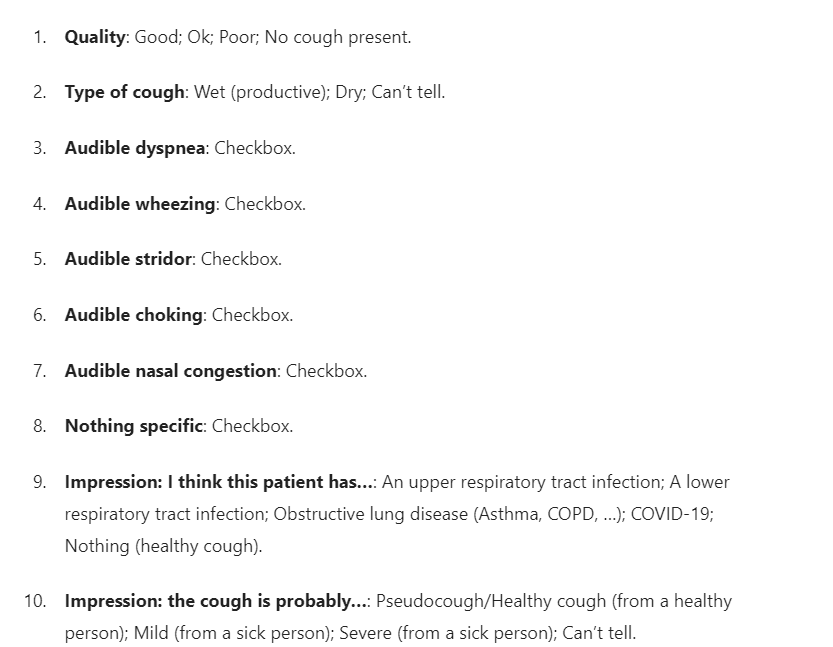

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [156]:
path = "public_dataset_v3/coughvid_20211012/"
df = pd.read_csv(path+"metadata_compiled.csv", index_col=0)
df.head()

,uuid,datetime,cough_detected,latitude,longitude,age,gender,respiratory_condition,fever_muscle_pain,status,...,quality_4,cough_type_4,dyspnea_4,wheezing_4,stridor_4,choking_4,congestion_4,nothing_4,diagnosis_4,severity_4
0,00014dcc-0f06-4c27-8c7b-737b18a2cf4c,2020-11-25T18:58:50.488301+00:00,0.0155,48.9,2.4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00039425-7f3a-42aa-ac13-834aaa2b6b92,2020-04-13T21:30:59.801831+00:00,0.9609,31.3,34.8,15.0,male,False,False,healthy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0007c6f1-5441-40e6-9aaf-a761d8f2da3b,2020-10-18T15:38:38.205870+00:00,0.1643,NaN,NaN,46.0,female,False,False,healthy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00098cdb-4da1-4aa7-825a-4f1b9abc214b,2021-01-22T22:08:06.742577+00:00,0.1133,47.4,9.4,66.0,female,False,False,healthy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0009eb28-d8be-4dc1-92bb-907e53bc5c7a,2020-04-12T04:02:18.159383+00:00,0.9301,40.0,-75.1,34.0,male,True,False,healthy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34434 entries, 0 to 34433
Data columns (total 51 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   uuid                   34434 non-null  object 
 1   datetime               34434 non-null  object 
 2   cough_detected         34434 non-null  float64
 3   latitude               19431 non-null  float64
 4   longitude              19431 non-null  float64
 5   age                    19396 non-null  float64
 6   gender                 20664 non-null  object 
 7   respiratory_condition  20664 non-null  object 
 8   fever_muscle_pain      20664 non-null  object 
 9   status                 20664 non-null  object 
 10  status_SSL             8331 non-null   object 
 11  quality_1              820 non-null    object 
 12  cough_type_1           820 non-null    object 
 13  dyspnea_1              820 non-null    object 
 14  wheezing_1             820 non-null    object 
 15  st

In [158]:
df.isnull().sum()

uuid                         0
datetime                     0
cough_detected               0
latitude                 15003
longitude                15003
age                      15038
gender                   13770
respiratory_condition    13770
fever_muscle_pain        13770
status                   13770
status_SSL               26103
quality_1                33614
cough_type_1             33614
dyspnea_1                33614
wheezing_1               33614
stridor_1                33614
choking_1                33614
congestion_1             33614
nothing_1                33614
diagnosis_1              33614
severity_1               33614
quality_2                33614
cough_type_2             33615
dyspnea_2                33614
wheezing_2               33614
stridor_2                33614
choking_2                33614
congestion_2             33614
nothing_2                33614
diagnosis_2              33614
severity_2               33614
quality_3                33614
cough_ty

In [159]:
df.columns

Index(['uuid', 'datetime', 'cough_detected', 'latitude', 'longitude', 'age',
       'gender', 'respiratory_condition', 'fever_muscle_pain', 'status',
       'status_SSL', 'quality_1', 'cough_type_1', 'dyspnea_1', 'wheezing_1',
       'stridor_1', 'choking_1', 'congestion_1', 'nothing_1', 'diagnosis_1',
       'severity_1', 'quality_2', 'cough_type_2', 'dyspnea_2', 'wheezing_2',
       'stridor_2', 'choking_2', 'congestion_2', 'nothing_2', 'diagnosis_2',
       'severity_2', 'quality_3', 'cough_type_3', 'dyspnea_3', 'wheezing_3',
       'stridor_3', 'choking_3', 'congestion_3', 'nothing_3', 'diagnosis_3',
       'severity_3', 'quality_4', 'cough_type_4', 'dyspnea_4', 'wheezing_4',
       'stridor_4', 'choking_4', 'congestion_4', 'nothing_4', 'diagnosis_4',
       'severity_4'],
      dtype='object')

### Delete the columns which are not required

In [160]:
#we dont need datetime, latitude, longitude
df = df.drop(["datetime","latitude","longitude"], axis=1)
df.columns

Index(['uuid', 'cough_detected', 'age', 'gender', 'respiratory_condition',
       'fever_muscle_pain', 'status', 'status_SSL', 'quality_1',
       'cough_type_1', 'dyspnea_1', 'wheezing_1', 'stridor_1', 'choking_1',
       'congestion_1', 'nothing_1', 'diagnosis_1', 'severity_1', 'quality_2',
       'cough_type_2', 'dyspnea_2', 'wheezing_2', 'stridor_2', 'choking_2',
       'congestion_2', 'nothing_2', 'diagnosis_2', 'severity_2', 'quality_3',
       'cough_type_3', 'dyspnea_3', 'wheezing_3', 'stridor_3', 'choking_3',
       'congestion_3', 'nothing_3', 'diagnosis_3', 'severity_3', 'quality_4',
       'cough_type_4', 'dyspnea_4', 'wheezing_4', 'stridor_4', 'choking_4',
       'congestion_4', 'nothing_4', 'diagnosis_4', 'severity_4'],
      dtype='object')

### Detect categorical and numerical value columns from the dataframe

In [161]:
categorical_cols = df.select_dtypes(include=["object"]).columns
print("categorical_cols")
print(categorical_cols)
numerical_cols = df.select_dtypes(include=np.number).columns
print("numerical_cols")
print(numerical_cols)

categorical_cols
Index(['uuid', 'gender', 'respiratory_condition', 'fever_muscle_pain',
       'status', 'status_SSL', 'quality_1', 'cough_type_1', 'dyspnea_1',
       'wheezing_1', 'stridor_1', 'choking_1', 'congestion_1', 'nothing_1',
       'diagnosis_1', 'severity_1', 'quality_2', 'cough_type_2', 'dyspnea_2',
       'wheezing_2', 'stridor_2', 'choking_2', 'congestion_2', 'nothing_2',
       'diagnosis_2', 'severity_2', 'quality_3', 'cough_type_3', 'dyspnea_3',
       'wheezing_3', 'stridor_3', 'choking_3', 'congestion_3', 'nothing_3',
       'diagnosis_3', 'severity_3', 'quality_4', 'cough_type_4', 'dyspnea_4',
       'wheezing_4', 'stridor_4', 'choking_4', 'congestion_4', 'nothing_4',
       'diagnosis_4', 'severity_4'],
      dtype='object')
numerical_cols
Index(['cough_detected', 'age'], dtype='object')


### Print unique values in each of the categorical columns and count of each unique value

In [162]:
for column in categorical_cols[1:]:
    #we started from one because we dont want to consider uuid
    unique_values = df[column].value_counts()
    non_null_values = df[column].count()
    print(f"Column: {column} - Non null values: {non_null_values}")
    print(unique_values)
    print()

Column: gender - Non null values: 20664
male      12850
female     7682
other       132
Name: gender, dtype: int64

Column: respiratory_condition - Non null values: 20664
False    17107
True      3557
Name: respiratory_condition, dtype: int64

Column: fever_muscle_pain - Non null values: 20664
False    18179
True      2485
Name: fever_muscle_pain, dtype: int64

Column: status - Non null values: 20664
healthy        15476
symptomatic     3873
COVID-19        1315
Name: status, dtype: int64

Column: status_SSL - Non null values: 8331
healthy     8046
COVID-19     285
Name: status_SSL, dtype: int64

Column: quality_1 - Non null values: 820
ok          614
poor        156
good         32
no_cough     18
Name: quality_1, dtype: int64

Column: cough_type_1 - Non null values: 820
dry        425
unknown    323
wet         72
Name: cough_type_1, dtype: int64

Column: dyspnea_1 - Non null values: 820
False    815
True       5
Name: dyspnea_1, dtype: int64

Column: wheezing_1 - Non null values: 8

### QUALITY columns analysis

In [163]:
# df_verified_records = pd.DataFrame()
# df_verified_records = df
# df_verified_records = df_experts_verified_records[df_experts_verified_records["cough_detected"]>=0.8]
# quality_df = pd.DataFrame().assign(quality_1=df_verified_records["quality_1"], quality_2 = df_verified_records["quality_2"], quality_3 = df_verified_records["quality_3"], quality_4 = df_verified_records["quality_4"])
# quality_df

In [164]:
#matching the consistency of quality column by 4 experts
quality_df = pd.DataFrame().assign(quality_1=df["quality_1"], quality_2 = df["quality_2"], quality_3 = df["quality_3"], quality_4 = df["quality_4"])
quality_df

,quality_1,quality_2,quality_3,quality_4
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
34429,NaN,NaN,NaN,NaN
34430,NaN,NaN,NaN,NaN
34431,NaN,NaN,NaN,NaN
34432,NaN,NaN,NaN,NaN


In [165]:
#we got a lot of NaN so we will drop all the rows in quality_df which have all nulls
quality_df = quality_df.dropna(how="all")

In [166]:
quality_df

#categorical values in each column are:
#ok          
#poor        
#good         
#no_cough     

,quality_1,quality_2,quality_3,quality_4
14,NaN,NaN,NaN,good
16,NaN,NaN,good,NaN
42,NaN,good,NaN,NaN
51,ok,NaN,NaN,NaN
70,NaN,NaN,good,NaN
...,...,...,...,...
34407,NaN,NaN,good,NaN
34411,no_cough,NaN,NaN,NaN
34413,NaN,NaN,NaN,ok
34421,NaN,NaN,NaN,poor


<a id='audio-quality-check'>Check Audio Quality given by experts</a>

In [167]:
#check for columns where atleast one expert has given audio quality check as good or ok

labels_to_check = ["good","ok"]
quality_df_with_atleast_one_expert_labelled_audio_qulaity_as_good_or_ok = quality_df[quality_df.isin(labels_to_check).any(axis=1)]
quality_df_with_atleast_one_expert_labelled_audio_qulaity_as_good_or_ok

#2573 audios are labelled good or ok by more than one expert

,quality_1,quality_2,quality_3,quality_4
14,NaN,NaN,NaN,good
16,NaN,NaN,good,NaN
42,NaN,good,NaN,NaN
51,ok,NaN,NaN,NaN
70,NaN,NaN,good,NaN
...,...,...,...,...
34380,ok,NaN,NaN,NaN
34394,NaN,NaN,good,NaN
34407,NaN,NaN,good,NaN
34413,NaN,NaN,NaN,ok


In [168]:
#check for columns where more than one expert has given audio quality check
quality_df_with_more_than_one_expert_labelled_audio_qulaity = quality_df[quality_df.notnull().sum(axis=1)>1]
quality_df_with_more_than_one_expert_labelled_audio_qulaity
#only 130 records have quality labelled by more than 1 experts

,quality_1,quality_2,quality_3,quality_4
186,good,good,good,good
266,poor,ok,good,good
2077,ok,poor,good,good
2079,ok,ok,good,good
3486,poor,poor,good,ok
...,...,...,...,...
33151,ok,good,good,good
33544,poor,good,good,good
34099,ok,good,good,good
34290,ok,ok,good,good


In [140]:
#check for columns where more than one expert has given audio quality check as good or ok

labels_to_check = ["good","ok"]

quality_df_with_more_than_one_expert_labelled_audio_qulaity_as_good_or_ok = quality_df_with_more_than_one_expert_labelled_audio_qulaity[quality_df_with_more_than_one_expert_labelled_audio_qulaity.isin(labels_to_check).sum(axis=1)>=1]
quality_df_with_more_than_one_expert_labelled_audio_qulaity_as_good_or_ok

#126 audios are labelled good or ok by more than one expert

,quality_1,quality_2,quality_3,quality_4
186,good,good,good,good
266,poor,ok,good,good
2077,ok,poor,good,good
2079,ok,ok,good,good
3486,poor,poor,good,ok
...,...,...,...,...
33151,ok,good,good,good
33544,poor,good,good,good
34099,ok,good,good,good
34290,ok,ok,good,good


### From above it is clear that out of 34434 entries, the ones usable are 2890 rows because they are labelled with quality and we require rows with quality good or ok atleast once, so we have 2573 usable rows

### For data cleaning purpose, first let's remove rows where all column values are null

In [141]:
# we will not consider uuid because that column doesn't contribute as feature for cough severity detection
df_filtered = df.dropna(subset=df.columns.difference(['uuid']), how="all")
df_filtered #we have no rows where all symptoms are null

,uuid,cough_detected,age,gender,respiratory_condition,fever_muscle_pain,status,status_SSL,quality_1,cough_type_1,...,quality_4,cough_type_4,dyspnea_4,wheezing_4,stridor_4,choking_4,congestion_4,nothing_4,diagnosis_4,severity_4
0,00014dcc-0f06-4c27-8c7b-737b18a2cf4c,0.0155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00039425-7f3a-42aa-ac13-834aaa2b6b92,0.9609,15.0,male,False,False,healthy,healthy,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0007c6f1-5441-40e6-9aaf-a761d8f2da3b,0.1643,46.0,female,False,False,healthy,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00098cdb-4da1-4aa7-825a-4f1b9abc214b,0.1133,66.0,female,False,False,healthy,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0009eb28-d8be-4dc1-92bb-907e53bc5c7a,0.9301,34.0,male,True,False,healthy,healthy,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34429,fff3ff61-2387-4139-938b-539db01e6be5,0.5257,NaN,female,False,False,symptomatic,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34430,fff474bf-39a4-4a61-8348-6b992fb5e439,0.1945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34431,fffaa9f8-4db0-46c5-90fb-93b7b014b55d,0.0243,50.0,male,True,True,healthy,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34432,fffce9f0-a5e8-4bee-b13b-c671aac4a61c,0.9754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Let's explore how factors like gender, fever_muscle_pain, respiratory_condition correlate with status

In [142]:
df_correlation_1 = pd.DataFrame().assign(gender=df_filtered["gender"], fever_muscle_pain = df_filtered["fever_muscle_pain"], respiratory_condition = df_filtered["respiratory_condition"], status=df_filtered["status"])
df_correlation_1

,gender,fever_muscle_pain,respiratory_condition,status
0,NaN,NaN,NaN,NaN
1,male,False,False,healthy
2,female,False,False,healthy
3,female,False,False,healthy
4,male,False,True,healthy
...,...,...,...,...
34429,female,False,False,symptomatic
34430,NaN,NaN,NaN,NaN
34431,male,True,True,healthy
34432,NaN,NaN,NaN,NaN


In [143]:
#remove null values rows
df_correlation_1 = df_correlation_1.dropna(how="all")
df_correlation_1

,gender,fever_muscle_pain,respiratory_condition,status
1,male,False,False,healthy
2,female,False,False,healthy
3,female,False,False,healthy
4,male,False,True,healthy
6,male,False,False,healthy
...,...,...,...,...
34426,female,False,False,healthy
34427,male,False,True,healthy
34429,female,False,False,symptomatic
34431,male,True,True,healthy


In [144]:
#status column has following values
#healthy        
#symptomatic     
#COVID-19    

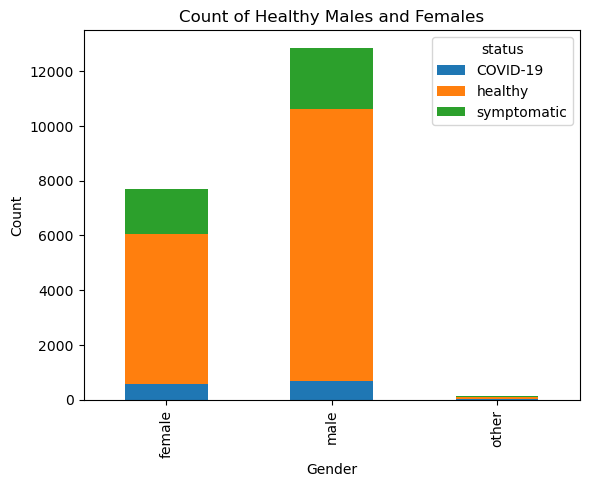

In [145]:
#let's plot how many healthy males and healthy females are there
df_correlation_1_gender_healthy = df_correlation_1.groupby(["gender","status"]).size().unstack()
df_correlation_1_gender_healthy.plot(kind="bar", stacked=True)

plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Count of Healthy Males and Females")

plt.show()

#as we can see most of the records are of healthy people and males are more than other two genders

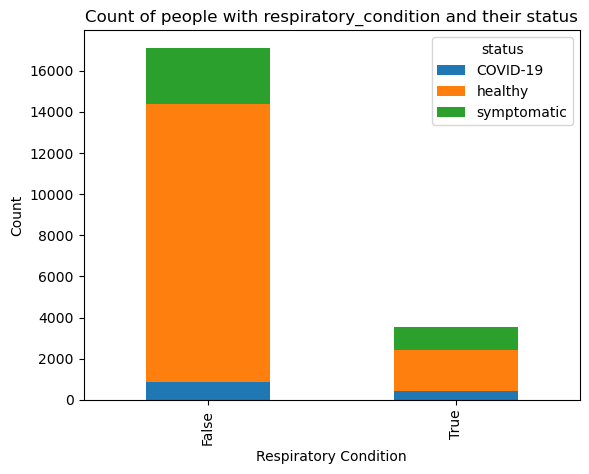

In [146]:
#respiratory_condition column has following values
#True     
#False 

#let's plot graph between respiratory_issue and status
df_correlation_1_respiratory_issue_status = df_correlation_1.groupby(["respiratory_condition","status"]).size().unstack()
df_correlation_1_respiratory_issue_status.plot(kind="bar", stacked=True)

plt.xlabel("Respiratory Condition")
plt.ylabel("Count")
plt.title("Count of people with respiratory_condition and their status")

plt.show()

#as we can see most of the records are of people who don't have previous respiratory_condition and most of them are healthy

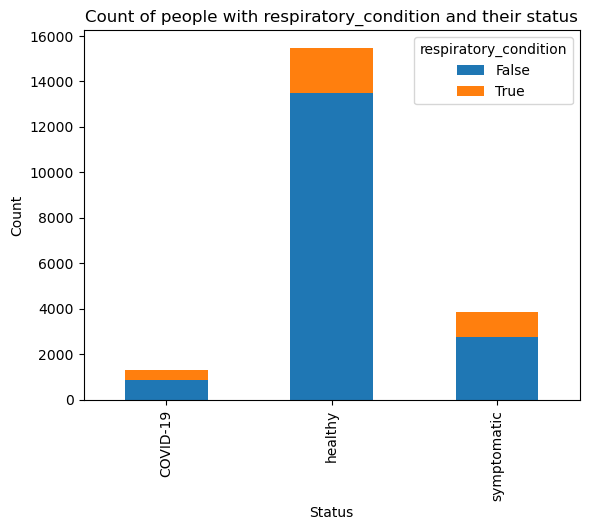

In [147]:
#respiratory_condition column has following values
#True     
#False 

#let's plot graph between respiratory_issue and status
df_correlation_1_status_respiratory_issue = df_correlation_1.groupby(["status","respiratory_condition"]).size().unstack()
df_correlation_1_status_respiratory_issue.plot(kind="bar", stacked=True)

plt.xlabel("Status")
plt.ylabel("Count")
plt.title("Count of people with respiratory_condition and their status")

plt.show()

#as we can see most of the records are of people who don't have previous respiratory_condition and most of them are healthy

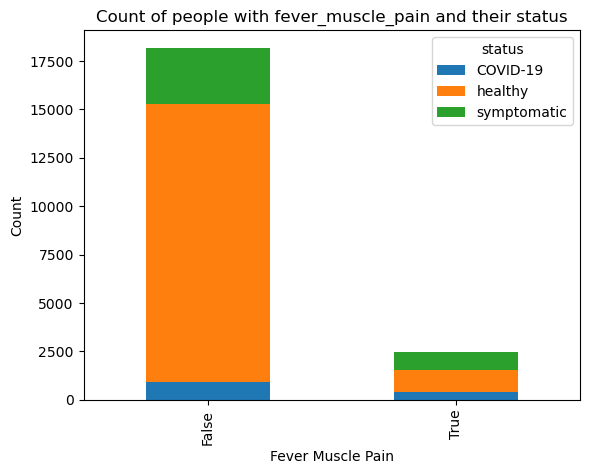

In [148]:
#fever_muscle_pain column has following values
#True     
#False 

#let's plot graph between fever_muscle_pain and status

df_correlation_1_fever_muscle_pain_status = df_correlation_1.groupby(["fever_muscle_pain","status"]).size().unstack()
df_correlation_1_fever_muscle_pain_status.plot(kind="bar", stacked=True)

plt.xlabel("Fever Muscle Pain")
plt.ylabel("Count")
plt.title("Count of people with fever_muscle_pain and their status")

plt.show()

#as we can see most of the records are of people who don't have fever_muscle_pain and most of them are healthy

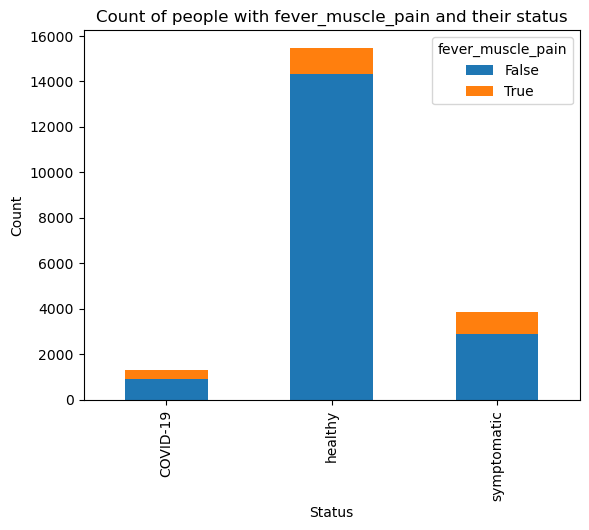

In [149]:
#fever_muscle_pain column has following values
#True     
#False 

#let's plot graph between fever_muscle_pain and status

df_correlation_1_fever_status_muscle_pain = df_correlation_1.groupby(["status","fever_muscle_pain"]).size().unstack()
df_correlation_1_fever_status_muscle_pain.plot(kind="bar", stacked=True)

plt.xlabel("Status")
plt.ylabel("Count")
plt.title("Count of people with fever_muscle_pain and their status")

plt.show()

#as we can see most of the records are of people who don't have fever_muscle_pain and most of them are healthy

### Let's explore records verified by more than one experts

In [240]:
df_experts_verified_records = pd.DataFrame()
df_experts_verified_records = df

In [241]:
#remove rows where cough detected probability is less than 0.8 
df_experts_verified_records = df_experts_verified_records[df_experts_verified_records["cough_detected"]>=0.8]
df_experts_verified_records

,uuid,cough_detected,age,gender,respiratory_condition,fever_muscle_pain,status,status_SSL,quality_1,cough_type_1,...,quality_4,cough_type_4,dyspnea_4,wheezing_4,stridor_4,choking_4,congestion_4,nothing_4,diagnosis_4,severity_4
1,00039425-7f3a-42aa-ac13-834aaa2b6b92,0.9609,15.0,male,False,False,healthy,healthy,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0009eb28-d8be-4dc1-92bb-907e53bc5c7a,0.9301,34.0,male,True,False,healthy,healthy,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,001328dc-ea5d-4847-9ccf-c5aa2a3f2d0f,0.9968,21.0,male,False,False,healthy,healthy,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,0028b68c-aca4-4f4f-bb1d-cb4ed5bbd952,0.8937,28.0,female,False,False,healthy,healthy,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,00291cce-36a0-4a29-9e2d-c1d96ca17242,0.9883,15.0,male,False,False,healthy,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34425,ffedc843-bfc2-4ad6-a749-2bc86bdac84a,0.9498,23.0,male,False,False,healthy,healthy,NaN,NaN,...,good,dry,False,False,False,False,False,True,healthy_cough,pseudocough
34426,ffeea120-92a4-40f9-b692-c3865c7a983f,0.9784,22.0,female,False,False,healthy,healthy,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34428,fff30afc-db62-4408-a585-07ca9a254fcc,0.9698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34432,fffce9f0-a5e8-4bee-b13b-c671aac4a61c,0.9754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [242]:
#so we have 18544 rows in which cough was detected according to the filter provided by COUGHVID

#check for rows where audio quality is good or ok according to one expert 
labels_to_check = ["good","ok"]
condition_1 = df_experts_verified_records["quality_1"].isin(labels_to_check)
condition_2 = df_experts_verified_records["quality_2"].isin(labels_to_check)
condition_3 = df_experts_verified_records["quality_3"].isin(labels_to_check)
condition_4 = df_experts_verified_records["quality_4"].isin(labels_to_check)
df_experts_verified_records_one_expert_quality = df_experts_verified_records[condition_1 | condition_2 |condition_3 | condition_4]

In [243]:
df_experts_verified_records_one_expert_quality

,uuid,cough_detected,age,gender,respiratory_condition,fever_muscle_pain,status,status_SSL,quality_1,cough_type_1,...,quality_4,cough_type_4,dyspnea_4,wheezing_4,stridor_4,choking_4,congestion_4,nothing_4,diagnosis_4,severity_4
14,0029d048-898a-4c70-89c7-0815cdcf7391,0.9456,35.0,male,True,False,symptomatic,healthy,NaN,NaN,...,good,dry,False,False,False,False,False,True,upper_infection,mild
16,002db0bd-e57f-4c30-ade0-16640d424eb7,0.9536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,005b8518-03ba-4bf5-86d2-005541442357,0.9854,23.0,female,False,False,healthy,healthy,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,008ba489-31ad-44d8-856b-fcf72369dc46,0.9962,28.0,female,False,False,healthy,healthy,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,008c1c9e-aeef-40c5-846c-24f1b964f884,0.9751,44.0,male,False,False,symptomatic,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34380,ff8bfcc9-3df2-4752-8280-63f023fba31c,0.9830,NaN,female,False,False,healthy,NaN,ok,dry,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34394,ffa718e8-da65-4602-8da8-cda7cdc568f2,0.9735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34407,ffbeb867-cdb7-4226-9456-e74c80acf2d9,0.9647,30.0,male,False,False,symptomatic,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34413,ffd18a56-096d-40fc-9862-e5c5a8ca1fcd,0.9953,25.0,female,False,False,healthy,healthy,NaN,NaN,...,ok,dry,False,False,False,False,False,True,COVID-19,mild


As in the cell <a id='#audio-quality-check'>Audio quality check given by experts</a>
We see that audio with quality good or ok are 2573 but here we got only 2269. <br>
The reason for this anomaly is we removed rows where ml algorithm given score "cough_detected" column was less than 0.8.<br>
This means that there are few rows in where experts have labelled the audio as good or ok but the ml algo couldn't give the score properly.

<br>For our case we will consider audios where ml algo gave score equal to or greater than 0.8 and experts also labelled the audio as good or ok.<br>
Therefore records available for us are 2269.

In [244]:
#remove rows where diagnosis and severity from all experts is null
columns_to_check = ["diagnosis_1","severity_1","diagnosis_2","severity_2","diagnosis_3","severity_3", "diagnosis_4","severity_4"]
df_experts_verified_records_where_expert_diagnosis_severity_null = df_experts_verified_records_one_expert_quality.dropna(subset=columns_to_check, how="all")

df_experts_verified_records_where_expert_diagnosis_severity_null

#with this we have entries that have atleast one diagnosis or one severity present

,uuid,cough_detected,age,gender,respiratory_condition,fever_muscle_pain,status,status_SSL,quality_1,cough_type_1,...,quality_4,cough_type_4,dyspnea_4,wheezing_4,stridor_4,choking_4,congestion_4,nothing_4,diagnosis_4,severity_4
14,0029d048-898a-4c70-89c7-0815cdcf7391,0.9456,35.0,male,True,False,symptomatic,healthy,NaN,NaN,...,good,dry,False,False,False,False,False,True,upper_infection,mild
16,002db0bd-e57f-4c30-ade0-16640d424eb7,0.9536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,005b8518-03ba-4bf5-86d2-005541442357,0.9854,23.0,female,False,False,healthy,healthy,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,008ba489-31ad-44d8-856b-fcf72369dc46,0.9962,28.0,female,False,False,healthy,healthy,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,008c1c9e-aeef-40c5-846c-24f1b964f884,0.9751,44.0,male,False,False,symptomatic,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34380,ff8bfcc9-3df2-4752-8280-63f023fba31c,0.9830,NaN,female,False,False,healthy,NaN,ok,dry,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34394,ffa718e8-da65-4602-8da8-cda7cdc568f2,0.9735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34407,ffbeb867-cdb7-4226-9456-e74c80acf2d9,0.9647,30.0,male,False,False,symptomatic,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34413,ffd18a56-096d-40fc-9862-e5c5a8ca1fcd,0.9953,25.0,female,False,False,healthy,healthy,NaN,NaN,...,ok,dry,False,False,False,False,False,True,COVID-19,mild


In [245]:
#remove rows where diagnosis from all experts is null
columns_to_check = ["diagnosis_1","diagnosis_2","diagnosis_3", "diagnosis_4"]
df_experts_verified_records_where_expert_diagnosis_null = df_experts_verified_records_where_expert_diagnosis_severity_null.dropna(subset=columns_to_check, how="all")

df_experts_verified_records_where_expert_diagnosis_null

#with this we have entries that have no diagnosis by any expert

,uuid,cough_detected,age,gender,respiratory_condition,fever_muscle_pain,status,status_SSL,quality_1,cough_type_1,...,quality_4,cough_type_4,dyspnea_4,wheezing_4,stridor_4,choking_4,congestion_4,nothing_4,diagnosis_4,severity_4
14,0029d048-898a-4c70-89c7-0815cdcf7391,0.9456,35.0,male,True,False,symptomatic,healthy,NaN,NaN,...,good,dry,False,False,False,False,False,True,upper_infection,mild
16,002db0bd-e57f-4c30-ade0-16640d424eb7,0.9536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,005b8518-03ba-4bf5-86d2-005541442357,0.9854,23.0,female,False,False,healthy,healthy,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,008ba489-31ad-44d8-856b-fcf72369dc46,0.9962,28.0,female,False,False,healthy,healthy,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,008c1c9e-aeef-40c5-846c-24f1b964f884,0.9751,44.0,male,False,False,symptomatic,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34380,ff8bfcc9-3df2-4752-8280-63f023fba31c,0.9830,NaN,female,False,False,healthy,NaN,ok,dry,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34394,ffa718e8-da65-4602-8da8-cda7cdc568f2,0.9735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34407,ffbeb867-cdb7-4226-9456-e74c80acf2d9,0.9647,30.0,male,False,False,symptomatic,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34413,ffd18a56-096d-40fc-9862-e5c5a8ca1fcd,0.9953,25.0,female,False,False,healthy,healthy,NaN,NaN,...,ok,dry,False,False,False,False,False,True,COVID-19,mild


In [246]:
#remove rows where severity from all experts is null
columns_to_check = ["severity_1","severity_2","severity_3","severity_4"]
df_experts_verified_records_where_expert_severity_null = df_experts_verified_records_where_expert_diagnosis_severity_null.dropna(subset=columns_to_check, how="all")

df_experts_verified_records_where_expert_severity_null

#with this we have entries that have no diagnosis by any expert

,uuid,cough_detected,age,gender,respiratory_condition,fever_muscle_pain,status,status_SSL,quality_1,cough_type_1,...,quality_4,cough_type_4,dyspnea_4,wheezing_4,stridor_4,choking_4,congestion_4,nothing_4,diagnosis_4,severity_4
14,0029d048-898a-4c70-89c7-0815cdcf7391,0.9456,35.0,male,True,False,symptomatic,healthy,NaN,NaN,...,good,dry,False,False,False,False,False,True,upper_infection,mild
16,002db0bd-e57f-4c30-ade0-16640d424eb7,0.9536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,005b8518-03ba-4bf5-86d2-005541442357,0.9854,23.0,female,False,False,healthy,healthy,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,008ba489-31ad-44d8-856b-fcf72369dc46,0.9962,28.0,female,False,False,healthy,healthy,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,008c1c9e-aeef-40c5-846c-24f1b964f884,0.9751,44.0,male,False,False,symptomatic,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34380,ff8bfcc9-3df2-4752-8280-63f023fba31c,0.9830,NaN,female,False,False,healthy,NaN,ok,dry,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34394,ffa718e8-da65-4602-8da8-cda7cdc568f2,0.9735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34407,ffbeb867-cdb7-4226-9456-e74c80acf2d9,0.9647,30.0,male,False,False,symptomatic,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34413,ffd18a56-096d-40fc-9862-e5c5a8ca1fcd,0.9953,25.0,female,False,False,healthy,healthy,NaN,NaN,...,ok,dry,False,False,False,False,False,True,COVID-19,mild


In [247]:
#check rows where all severity is null
columns_to_check_severity = ["severity_1","severity_2","severity_3","severity_4"]
filtered_rows_with_no_severity = df_experts_verified_records_one_expert_quality[df_experts_verified_records_one_expert_quality[columns_to_check_severity].isna().all(axis=1)]
filtered_rows_with_no_severity

,uuid,cough_detected,age,gender,respiratory_condition,fever_muscle_pain,status,status_SSL,quality_1,cough_type_1,...,quality_4,cough_type_4,dyspnea_4,wheezing_4,stridor_4,choking_4,congestion_4,nothing_4,diagnosis_4,severity_4
12577,5d7f356e-f0bf-4cee-896d-9341e81ddaaf,0.9744,34.0,male,False,False,symptomatic,NaN,NaN,NaN,...,good,dry,False,False,True,False,False,False,obstructive_disease,NaN


In [248]:
filtered_rows_with_no_severity.iloc[0]

uuid                     5d7f356e-f0bf-4cee-896d-9341e81ddaaf
cough_detected                                         0.9744
age                                                      34.0
gender                                                   male
respiratory_condition                                   False
fever_muscle_pain                                       False
status                                            symptomatic
status_SSL                                                NaN
quality_1                                                 NaN
cough_type_1                                              NaN
dyspnea_1                                                 NaN
wheezing_1                                                NaN
stridor_1                                                 NaN
choking_1                                                 NaN
congestion_1                                              NaN
nothing_1                                                 NaN
diagnosi

In [249]:
#check rows where all the diagnosis is null
columns_to_check_diagnosis = ["diagnosis_1","diagnosis_2","diagnosis_3", "diagnosis_4"]
filtered_rows_with_no_diagnosis = df_experts_verified_records_one_expert_quality[df_experts_verified_records_one_expert_quality[columns_to_check_diagnosis].isna().all(axis=1)]
filtered_rows_with_no_diagnosis

,uuid,cough_detected,age,gender,respiratory_condition,fever_muscle_pain,status,status_SSL,quality_1,cough_type_1,...,quality_4,cough_type_4,dyspnea_4,wheezing_4,stridor_4,choking_4,congestion_4,nothing_4,diagnosis_4,severity_4
31253,e86e02c9-3544-493a-986c-4e5b3cd82954,0.9854,40.0,female,False,False,healthy,NaN,NaN,NaN,...,ok,unknown,False,False,False,False,False,False,NaN,unknown


In [250]:
filtered_rows_with_no_diagnosis.iloc[0]

uuid                     e86e02c9-3544-493a-986c-4e5b3cd82954
cough_detected                                         0.9854
age                                                      40.0
gender                                                 female
respiratory_condition                                   False
fever_muscle_pain                                       False
status                                                healthy
status_SSL                                                NaN
quality_1                                                 NaN
cough_type_1                                              NaN
dyspnea_1                                                 NaN
wheezing_1                                                NaN
stridor_1                                                 NaN
choking_1                                                 NaN
congestion_1                                              NaN
nothing_1                                                 NaN
diagnosi

In [251]:
#if we see from above we have records where severity values are unknown and whole record is almost null, we can remove them.
#remove records where there is no diagnosis or severity present or if severity present it is null

columns_to_check_diagnosis = ["diagnosis_1","diagnosis_2","diagnosis_3", "diagnosis_4"]
columns_to_check_severity = ["severity_1","severity_2","severity_3","severity_4"]

row_where_experts_verified_records_where_expert_diagnosis_severity_null = df_experts_verified_records_one_expert_quality[(df_experts_verified_records_one_expert_quality[columns_to_check_diagnosis].isna().all(axis=1)) & (df_experts_verified_records_one_expert_quality[columns_to_check_severity].isna() | df_experts_verified_records_one_expert_quality[columns_to_check_severity].eq("unknown")).all(axis=1)]

row_where_experts_verified_records_where_expert_diagnosis_severity_null

,uuid,cough_detected,age,gender,respiratory_condition,fever_muscle_pain,status,status_SSL,quality_1,cough_type_1,...,quality_4,cough_type_4,dyspnea_4,wheezing_4,stridor_4,choking_4,congestion_4,nothing_4,diagnosis_4,severity_4
31253,e86e02c9-3544-493a-986c-4e5b3cd82954,0.9854,40.0,female,False,False,healthy,NaN,NaN,NaN,...,ok,unknown,False,False,False,False,False,False,NaN,unknown


In [252]:
row_where_experts_verified_records_where_expert_diagnosis_severity_null.iloc[0]

uuid                     e86e02c9-3544-493a-986c-4e5b3cd82954
cough_detected                                         0.9854
age                                                      40.0
gender                                                 female
respiratory_condition                                   False
fever_muscle_pain                                       False
status                                                healthy
status_SSL                                                NaN
quality_1                                                 NaN
cough_type_1                                              NaN
dyspnea_1                                                 NaN
wheezing_1                                                NaN
stridor_1                                                 NaN
choking_1                                                 NaN
congestion_1                                              NaN
nothing_1                                                 NaN
diagnosi

In [253]:
#if we see from above we have records where severity values are unknown and whole record is almost null, we can remove them.
#remove records where there is no diagnosis or severity present or if severity present it is null

columns_to_check_diagnosis = ["diagnosis_1","diagnosis_2","diagnosis_3", "diagnosis_4"]
columns_to_check_severity = ["severity_1","severity_2","severity_3","severity_4"]

df_experts_verified_records_where_expert_diagnosis_severity_not_null = df_experts_verified_records_one_expert_quality[-((df_experts_verified_records_one_expert_quality[columns_to_check_diagnosis].isna().all(axis=1)) & (df_experts_verified_records_one_expert_quality[columns_to_check_severity].isna() | df_experts_verified_records_one_expert_quality[columns_to_check_severity].eq("unknown")).all(axis=1))]

df_experts_verified_records_where_expert_diagnosis_severity_not_null
#this our final dataframe with 2268 records which has atleast one expert given diagnosis and severity

,uuid,cough_detected,age,gender,respiratory_condition,fever_muscle_pain,status,status_SSL,quality_1,cough_type_1,...,quality_4,cough_type_4,dyspnea_4,wheezing_4,stridor_4,choking_4,congestion_4,nothing_4,diagnosis_4,severity_4
14,0029d048-898a-4c70-89c7-0815cdcf7391,0.9456,35.0,male,True,False,symptomatic,healthy,NaN,NaN,...,good,dry,False,False,False,False,False,True,upper_infection,mild
16,002db0bd-e57f-4c30-ade0-16640d424eb7,0.9536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,005b8518-03ba-4bf5-86d2-005541442357,0.9854,23.0,female,False,False,healthy,healthy,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,008ba489-31ad-44d8-856b-fcf72369dc46,0.9962,28.0,female,False,False,healthy,healthy,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,008c1c9e-aeef-40c5-846c-24f1b964f884,0.9751,44.0,male,False,False,symptomatic,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34380,ff8bfcc9-3df2-4752-8280-63f023fba31c,0.9830,NaN,female,False,False,healthy,NaN,ok,dry,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34394,ffa718e8-da65-4602-8da8-cda7cdc568f2,0.9735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34407,ffbeb867-cdb7-4226-9456-e74c80acf2d9,0.9647,30.0,male,False,False,symptomatic,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34413,ffd18a56-096d-40fc-9862-e5c5a8ca1fcd,0.9953,25.0,female,False,False,healthy,healthy,NaN,NaN,...,ok,dry,False,False,False,False,False,True,COVID-19,mild


In [254]:
df_experts_verified_records_where_expert_diagnosis_severity_null.iloc[4]

uuid                     008c1c9e-aeef-40c5-846c-24f1b964f884
cough_detected                                         0.9751
age                                                      44.0
gender                                                   male
respiratory_condition                                   False
fever_muscle_pain                                       False
status                                            symptomatic
status_SSL                                                NaN
quality_1                                                 NaN
cough_type_1                                              NaN
dyspnea_1                                                 NaN
wheezing_1                                                NaN
stridor_1                                                 NaN
choking_1                                                 NaN
congestion_1                                              NaN
nothing_1                                                 NaN
diagnosi

In [255]:
#we can also remove the quality columns now because that is just one idicator for quality of audio
df_experts_verified_records_where_expert_diagnosis_severity_null

,uuid,cough_detected,age,gender,respiratory_condition,fever_muscle_pain,status,status_SSL,quality_1,cough_type_1,...,quality_4,cough_type_4,dyspnea_4,wheezing_4,stridor_4,choking_4,congestion_4,nothing_4,diagnosis_4,severity_4
14,0029d048-898a-4c70-89c7-0815cdcf7391,0.9456,35.0,male,True,False,symptomatic,healthy,NaN,NaN,...,good,dry,False,False,False,False,False,True,upper_infection,mild
16,002db0bd-e57f-4c30-ade0-16640d424eb7,0.9536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,005b8518-03ba-4bf5-86d2-005541442357,0.9854,23.0,female,False,False,healthy,healthy,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,008ba489-31ad-44d8-856b-fcf72369dc46,0.9962,28.0,female,False,False,healthy,healthy,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,008c1c9e-aeef-40c5-846c-24f1b964f884,0.9751,44.0,male,False,False,symptomatic,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34380,ff8bfcc9-3df2-4752-8280-63f023fba31c,0.9830,NaN,female,False,False,healthy,NaN,ok,dry,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34394,ffa718e8-da65-4602-8da8-cda7cdc568f2,0.9735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34407,ffbeb867-cdb7-4226-9456-e74c80acf2d9,0.9647,30.0,male,False,False,symptomatic,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34413,ffd18a56-096d-40fc-9862-e5c5a8ca1fcd,0.9953,25.0,female,False,False,healthy,healthy,NaN,NaN,...,ok,dry,False,False,False,False,False,True,COVID-19,mild


In [257]:
df_experts_verified_records_where_expert_diagnosis_severity_not_null = df_experts_verified_records_where_expert_diagnosis_severity_not_null.drop(["quality_1","quality_2","quality_3","quality_4"], axis=1)
df_experts_verified_records_where_expert_diagnosis_severity_not_null

,uuid,cough_detected,age,gender,respiratory_condition,fever_muscle_pain,status,status_SSL,cough_type_1,dyspnea_1,...,severity_3,cough_type_4,dyspnea_4,wheezing_4,stridor_4,choking_4,congestion_4,nothing_4,diagnosis_4,severity_4
14,0029d048-898a-4c70-89c7-0815cdcf7391,0.9456,35.0,male,True,False,symptomatic,healthy,NaN,NaN,...,NaN,dry,False,False,False,False,False,True,upper_infection,mild
16,002db0bd-e57f-4c30-ade0-16640d424eb7,0.9536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,pseudocough,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,005b8518-03ba-4bf5-86d2-005541442357,0.9854,23.0,female,False,False,healthy,healthy,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,008ba489-31ad-44d8-856b-fcf72369dc46,0.9962,28.0,female,False,False,healthy,healthy,NaN,NaN,...,mild,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,008c1c9e-aeef-40c5-846c-24f1b964f884,0.9751,44.0,male,False,False,symptomatic,NaN,NaN,NaN,...,pseudocough,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34380,ff8bfcc9-3df2-4752-8280-63f023fba31c,0.9830,NaN,female,False,False,healthy,NaN,dry,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34394,ffa718e8-da65-4602-8da8-cda7cdc568f2,0.9735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,mild,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34407,ffbeb867-cdb7-4226-9456-e74c80acf2d9,0.9647,30.0,male,False,False,symptomatic,NaN,NaN,NaN,...,mild,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34413,ffd18a56-096d-40fc-9862-e5c5a8ca1fcd,0.9953,25.0,female,False,False,healthy,healthy,NaN,NaN,...,NaN,dry,False,False,False,False,False,True,COVID-19,mild


In [258]:
df_experts_verified_records_where_expert_diagnosis_severity_not_null.columns

Index(['uuid', 'cough_detected', 'age', 'gender', 'respiratory_condition',
       'fever_muscle_pain', 'status', 'status_SSL', 'cough_type_1',
       'dyspnea_1', 'wheezing_1', 'stridor_1', 'choking_1', 'congestion_1',
       'nothing_1', 'diagnosis_1', 'severity_1', 'cough_type_2', 'dyspnea_2',
       'wheezing_2', 'stridor_2', 'choking_2', 'congestion_2', 'nothing_2',
       'diagnosis_2', 'severity_2', 'cough_type_3', 'dyspnea_3', 'wheezing_3',
       'stridor_3', 'choking_3', 'congestion_3', 'nothing_3', 'diagnosis_3',
       'severity_3', 'cough_type_4', 'dyspnea_4', 'wheezing_4', 'stridor_4',
       'choking_4', 'congestion_4', 'nothing_4', 'diagnosis_4', 'severity_4'],
      dtype='object')

In [259]:
#cough_detected can also be removed but we will remove it later

In [234]:
#check for columns 'cough_type_1', 'dyspnea_1','wheezing_1', 'stridor_1', 'choking_1', 'congestion_1', 'nothing_1',
#'diagnosis_1', 'severity_1',  'cough_type_2', 'dyspnea_2','wheezing_2', 'stridor_2', 'choking_2', 'congestion_2', 
#'nothing_2','diagnosis_2', 'severity_2', 'cough_type_3', 'dyspnea_3','wheezing_3', 'stridor_3', 'choking_3', 
#'congestion_3', 'nothing_3','diagnosis_3', 'severity_3', 'cough_type_4', 'dyspnea_4','wheezing_4', 'stridor_4', 
#'choking_4', 'congestion_4', 'nothing_4','diagnosis_4', 'severity_4'

In [293]:
df_experts_verified_records_where_expert_diagnosis_severity_not_null.iloc[186]

uuid                     17022b71-56b2-403e-9da9-097810159d4a
cough_detected                                         0.9478
age                                                      29.0
gender                                                   male
respiratory_condition                                   False
fever_muscle_pain                                       False
status                                                healthy
status_SSL                                            healthy
cough_type_1                                              NaN
dyspnea_1                                                 NaN
wheezing_1                                                NaN
stridor_1                                                 NaN
choking_1                                                 NaN
congestion_1                                              NaN
nothing_1                                                 NaN
diagnosis_1                                               NaN
severity

## Now we will segment records into expert_1, expert_2, expert_3, expert_4 and all_experts based on diagnosis and severity given

In [315]:
#expert1

In [318]:
columns_to_check_1 = [
 'cough_type_1',
 'dyspnea_1',
 'wheezing_1',
 'stridor_1',
 'choking_1',
 'congestion_1',
 'nothing_1',
 'diagnosis_1']

columns_to_remove_1 = ['cough_type_2','severity_2','dyspnea_2','wheezing_2','stridor_2','choking_2','congestion_2','nothing_2','diagnosis_2',
                      'cough_type_3','severity_3','dyspnea_3','wheezing_3','stridor_3','choking_3','congestion_3','nothing_3','diagnosis_3',
                      'cough_type_4','severity_4','dyspnea_4','wheezing_4','stridor_4','choking_4','congestion_4','nothing_4','diagnosis_4']

expert_1_df = df_experts_verified_records_where_expert_diagnosis_severity_not_null[df_experts_verified_records_where_expert_diagnosis_severity_not_null[columns_to_check_1].notna().all(axis=1) & (df_experts_verified_records_where_expert_diagnosis_severity_not_null["severity_1"].notna() | df_experts_verified_records_where_expert_diagnosis_severity_not_null["severity_1"]!="unknown")].copy()
expert_1_df  = expert_1_df.drop(columns_to_remove_1, axis=1)
expert_1_df

,uuid,cough_detected,age,gender,respiratory_condition,fever_muscle_pain,status,status_SSL,cough_type_1,dyspnea_1,wheezing_1,stridor_1,choking_1,congestion_1,nothing_1,diagnosis_1,severity_1
186,01567151-7bb2-45ee-9aa8-a1332b5941ea,0.9820,NaN,NaN,NaN,NaN,NaN,NaN,dry,False,False,False,True,False,False,COVID-19,mild
212,018b40a1-c109-459a-9e31-86cbd2cb3918,0.9869,NaN,NaN,NaN,NaN,NaN,NaN,wet,False,False,False,False,False,True,lower_infection,mild
266,01ff40e8-63e6-4570-a463-9778ea30cad7,0.9686,24.0,other,False,False,symptomatic,NaN,dry,False,False,False,False,False,True,healthy_cough,pseudocough
476,0379c586-c500-483c-83a6-95b63afe6931,0.9916,63.0,male,True,False,COVID-19,NaN,dry,False,False,False,False,False,True,healthy_cough,pseudocough
483,038592cb-c8db-4f55-8052-e20059146cb5,0.9824,28.0,male,False,False,healthy,NaN,dry,False,False,False,False,False,True,COVID-19,mild
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34264,feabf097-bb15-4fdf-85ac-a9babbaf5d9e,0.9503,46.0,female,False,False,symptomatic,NaN,dry,False,False,False,False,False,True,lower_infection,mild
34272,feb93862-2508-4ca7-a74e-77701bbcd3c0,0.8560,25.0,male,False,True,symptomatic,NaN,dry,False,False,False,False,False,True,lower_infection,mild
34290,fed255ec-4829-4f4a-b22d-9bb23f2dd89f,0.9502,NaN,NaN,NaN,NaN,NaN,COVID-19,dry,False,False,False,False,False,True,COVID-19,mild
34319,ff1234d7-7837-4ba7-842f-99fdc916baa9,0.9947,29.0,male,False,True,symptomatic,NaN,dry,False,False,False,False,False,True,lower_infection,mild


In [319]:
expert_1_df.columns

Index(['uuid', 'cough_detected', 'age', 'gender', 'respiratory_condition',
       'fever_muscle_pain', 'status', 'status_SSL', 'cough_type_1',
       'dyspnea_1', 'wheezing_1', 'stridor_1', 'choking_1', 'congestion_1',
       'nothing_1', 'diagnosis_1', 'severity_1'],
      dtype='object')

In [ ]:
#expert2

In [320]:
columns_to_check_2 = ['diagnosis_2',
 'cough_type_2',
 'dyspnea_2',
 'wheezing_2',
 'stridor_2',
 'choking_2',
 'congestion_2',
 'nothing_2',
 'diagnosis_2']

columns_to_remove_2 = ['cough_type_1','severity_1','dyspnea_1','wheezing_1','stridor_1','choking_1','congestion_1','nothing_1','diagnosis_1',
                      'cough_type_3','severity_3','dyspnea_3','wheezing_3','stridor_3','choking_3','congestion_3','nothing_3','diagnosis_3',
                      'cough_type_4','severity_4','dyspnea_4','wheezing_4','stridor_4','choking_4','congestion_4','nothing_4','diagnosis_4']

expert_2_df = df_experts_verified_records_where_expert_diagnosis_severity_not_null[df_experts_verified_records_where_expert_diagnosis_severity_not_null[columns_to_check_2].notna().all(axis=1) & (df_experts_verified_records_where_expert_diagnosis_severity_not_null["severity_2"].notna() | df_experts_verified_records_where_expert_diagnosis_severity_not_null["severity_2"]!="unknown")].copy()
expert_2_df = expert_2_df.drop(columns_to_remove_2, axis=1)

expert_2_df

,uuid,cough_detected,age,gender,respiratory_condition,fever_muscle_pain,status,status_SSL,cough_type_2,dyspnea_2,wheezing_2,stridor_2,choking_2,congestion_2,nothing_2,diagnosis_2,severity_2
42,005b8518-03ba-4bf5-86d2-005541442357,0.9854,23.0,female,False,False,healthy,healthy,dry,False,False,False,False,False,True,lower_infection,mild
186,01567151-7bb2-45ee-9aa8-a1332b5941ea,0.9820,NaN,NaN,NaN,NaN,NaN,NaN,dry,True,False,False,False,False,False,COVID-19,mild
204,0177b817-0ba3-498a-bc05-48bc66cc91b8,0.8047,18.0,male,False,False,COVID-19,NaN,dry,False,False,True,False,False,False,obstructive_disease,mild
266,01ff40e8-63e6-4570-a463-9778ea30cad7,0.9686,24.0,other,False,False,symptomatic,NaN,dry,False,False,False,False,False,True,COVID-19,unknown
524,03d30b8b-03f8-4089-bda8-0e14deec7d82,0.9196,47.0,male,True,False,COVID-19,COVID-19,wet,False,False,True,False,False,False,COVID-19,mild
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34208,fe40afee-154b-4092-8626-baf91e2860ff,0.9887,59.0,male,False,False,symptomatic,NaN,wet,False,False,False,False,False,True,obstructive_disease,mild
34246,fe8c855a-21ba-4f61-b274-3acff1ea5265,0.9782,17.0,female,True,True,symptomatic,NaN,unknown,False,False,False,False,False,True,lower_infection,mild
34289,fed03a5c-6329-488c-a031-213ccdceabcf,0.9820,32.0,male,False,False,healthy,NaN,wet,False,False,False,False,False,True,lower_infection,mild
34290,fed255ec-4829-4f4a-b22d-9bb23f2dd89f,0.9502,NaN,NaN,NaN,NaN,NaN,COVID-19,dry,False,False,False,False,False,True,COVID-19,mild


In [ ]:
#expert3

In [321]:
columns_to_check_3 = ['diagnosis_3',
 'cough_type_3',
 'dyspnea_3',
 'wheezing_3',
 'stridor_3',
 'choking_3',
 'congestion_3',
 'nothing_3',
 'diagnosis_3']

columns_to_remove_3 = ['cough_type_1','severity_1','dyspnea_1','wheezing_1','stridor_1','choking_1','congestion_1','nothing_1','diagnosis_1',
                      'cough_type_2','severity_2','dyspnea_2','wheezing_2','stridor_2','choking_2','congestion_2','nothing_2','diagnosis_2',
                      'cough_type_4','severity_4','dyspnea_4','wheezing_4','stridor_4','choking_4','congestion_4','nothing_4','diagnosis_4']


expert_3_df = df_experts_verified_records_where_expert_diagnosis_severity_not_null[df_experts_verified_records_where_expert_diagnosis_severity_not_null[columns_to_check_3].notna().all(axis=1) & (df_experts_verified_records_where_expert_diagnosis_severity_not_null["severity_3"].notna() | df_experts_verified_records_where_expert_diagnosis_severity_not_null["severity_3"]!="unknown")].copy()
expert_3_df = expert_3_df.drop(columns_to_remove_3, axis=1)
expert_3_df

,uuid,cough_detected,age,gender,respiratory_condition,fever_muscle_pain,status,status_SSL,cough_type_3,dyspnea_3,wheezing_3,stridor_3,choking_3,congestion_3,nothing_3,diagnosis_3,severity_3
16,002db0bd-e57f-4c30-ade0-16640d424eb7,0.9536,NaN,NaN,NaN,NaN,NaN,NaN,unknown,False,False,False,False,False,True,healthy_cough,pseudocough
70,008ba489-31ad-44d8-856b-fcf72369dc46,0.9962,28.0,female,False,False,healthy,healthy,wet,False,False,True,False,False,False,lower_infection,mild
71,008c1c9e-aeef-40c5-846c-24f1b964f884,0.9751,44.0,male,False,False,symptomatic,NaN,wet,False,False,False,False,False,True,healthy_cough,pseudocough
98,00bf9f83-2e8f-47cf-a4f2-97f2beceebc1,0.9815,37.0,male,True,False,healthy,healthy,wet,False,False,False,False,False,False,healthy_cough,pseudocough
110,00ce5b06-c302-4387-bbd7-86355a4a8c12,0.9900,41.0,female,True,False,symptomatic,NaN,dry,True,False,False,False,False,False,upper_infection,severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34319,ff1234d7-7837-4ba7-842f-99fdc916baa9,0.9947,29.0,male,False,True,symptomatic,NaN,dry,False,False,False,False,False,True,upper_infection,mild
34344,ff49f6b7-fa54-4780-a4be-b0594e628aae,0.9540,17.0,female,False,True,symptomatic,NaN,wet,False,False,False,False,False,True,lower_infection,severe
34375,ff8435f6-76b5-42c1-8f4c-7479710e71bf,0.9947,38.0,male,False,True,healthy,NaN,dry,False,False,False,False,False,True,upper_infection,mild
34394,ffa718e8-da65-4602-8da8-cda7cdc568f2,0.9735,NaN,NaN,NaN,NaN,NaN,NaN,dry,False,False,False,False,False,True,upper_infection,mild


In [311]:
#expert4

In [327]:
columns_to_check_4 = ['diagnosis_4',
 'cough_type_4',
 'dyspnea_4',
 'wheezing_4',
 'stridor_4',
 'choking_4',
 'congestion_4',
 'nothing_4',
 'diagnosis_4']

columns_to_remove_4 = ['cough_type_2','severity_2','dyspnea_2','wheezing_2','stridor_2','choking_2','congestion_2','nothing_2','diagnosis_2',
                      'cough_type_3','severity_3','dyspnea_3','wheezing_3','stridor_3','choking_3','congestion_3','nothing_3','diagnosis_3',
                      'cough_type_1','severity_1','dyspnea_1','wheezing_1','stridor_1','choking_1','congestion_1','nothing_1','diagnosis_1']


expert_4_df = df_experts_verified_records_where_expert_diagnosis_severity_not_null[df_experts_verified_records_where_expert_diagnosis_severity_not_null[columns_to_check_4].notna().all(axis=1) & (df_experts_verified_records_where_expert_diagnosis_severity_not_null["severity_4"].notna() | df_experts_verified_records_where_expert_diagnosis_severity_not_null["severity_4"]!="unknown")].copy()
expert_4_df = expert_4_df.drop(columns_to_remove_4, axis=1)
expert_4_df 

,uuid,cough_detected,age,gender,respiratory_condition,fever_muscle_pain,status,status_SSL,cough_type_4,dyspnea_4,wheezing_4,stridor_4,choking_4,congestion_4,nothing_4,diagnosis_4,severity_4
14,0029d048-898a-4c70-89c7-0815cdcf7391,0.9456,35.0,male,True,False,symptomatic,healthy,dry,False,False,False,False,False,True,upper_infection,mild
185,015576c8-2b03-4dcb-b251-78a984fe86fe,0.9944,27.0,male,False,False,COVID-19,NaN,unknown,False,False,False,False,False,True,obstructive_disease,mild
186,01567151-7bb2-45ee-9aa8-a1332b5941ea,0.9820,NaN,NaN,NaN,NaN,NaN,NaN,dry,False,False,False,False,False,True,upper_infection,mild
192,01614a4a-947f-43ca-a609-fc2787509f6f,0.9380,23.0,male,False,False,symptomatic,NaN,wet,False,False,False,False,False,True,lower_infection,mild
207,01820f7c-b953-4faf-aa13-978cfda6b08e,0.8139,39.0,male,False,False,COVID-19,COVID-19,dry,True,True,False,False,False,False,obstructive_disease,severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34290,fed255ec-4829-4f4a-b22d-9bb23f2dd89f,0.9502,NaN,NaN,NaN,NaN,NaN,COVID-19,dry,False,False,False,False,False,True,upper_infection,mild
34319,ff1234d7-7837-4ba7-842f-99fdc916baa9,0.9947,29.0,male,False,True,symptomatic,NaN,dry,False,False,False,False,False,True,upper_infection,mild
34374,ff8363d2-016d-4738-9499-4c62480886fb,0.9933,NaN,female,False,False,COVID-19,NaN,dry,False,False,False,False,False,True,COVID-19,mild
34413,ffd18a56-096d-40fc-9862-e5c5a8ca1fcd,0.9953,25.0,female,False,False,healthy,healthy,dry,False,False,False,False,False,True,COVID-19,mild


### We have our data segmented now we can combine all rows to form one big dataset with one column each for columns separated by different experts

In [323]:
new_column_names = { 'cough_type_1': 'cough_type',
 'dyspnea_1': 'dyspnea',
 'wheezing_1':'wheezing',
 'stridor_1':'stridor',
 'choking_1':'choking',
 'congestion_1':'congestion',
 'nothing_1':'nothing',
 'diagnosis_1':'diagnosis',
 'severity_1':'severity'}
expert_1_df = expert_1_df.rename(columns=new_column_names)
expert_1_df

,uuid,cough_detected,age,gender,respiratory_condition,fever_muscle_pain,status,status_SSL,cough_type,dyspnea,wheezing,stridor,choking,congestion,nothing,diagnosis,severity
186,01567151-7bb2-45ee-9aa8-a1332b5941ea,0.9820,NaN,NaN,NaN,NaN,NaN,NaN,dry,False,False,False,True,False,False,COVID-19,mild
212,018b40a1-c109-459a-9e31-86cbd2cb3918,0.9869,NaN,NaN,NaN,NaN,NaN,NaN,wet,False,False,False,False,False,True,lower_infection,mild
266,01ff40e8-63e6-4570-a463-9778ea30cad7,0.9686,24.0,other,False,False,symptomatic,NaN,dry,False,False,False,False,False,True,healthy_cough,pseudocough
476,0379c586-c500-483c-83a6-95b63afe6931,0.9916,63.0,male,True,False,COVID-19,NaN,dry,False,False,False,False,False,True,healthy_cough,pseudocough
483,038592cb-c8db-4f55-8052-e20059146cb5,0.9824,28.0,male,False,False,healthy,NaN,dry,False,False,False,False,False,True,COVID-19,mild
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34264,feabf097-bb15-4fdf-85ac-a9babbaf5d9e,0.9503,46.0,female,False,False,symptomatic,NaN,dry,False,False,False,False,False,True,lower_infection,mild
34272,feb93862-2508-4ca7-a74e-77701bbcd3c0,0.8560,25.0,male,False,True,symptomatic,NaN,dry,False,False,False,False,False,True,lower_infection,mild
34290,fed255ec-4829-4f4a-b22d-9bb23f2dd89f,0.9502,NaN,NaN,NaN,NaN,NaN,COVID-19,dry,False,False,False,False,False,True,COVID-19,mild
34319,ff1234d7-7837-4ba7-842f-99fdc916baa9,0.9947,29.0,male,False,True,symptomatic,NaN,dry,False,False,False,False,False,True,lower_infection,mild


In [324]:
new_column_names = { 'cough_type_2': 'cough_type',
 'dyspnea_2': 'dyspnea',
 'wheezing_2':'wheezing',
 'stridor_2':'stridor',
 'choking_2':'choking',
 'congestion_2':'congestion',
 'nothing_2':'nothing',
 'diagnosis_2':'diagnosis',
 'severity_2':'severity'}
expert_2_df = expert_2_df.rename(columns=new_column_names)
expert_2_df

,uuid,cough_detected,age,gender,respiratory_condition,fever_muscle_pain,status,status_SSL,cough_type,dyspnea,wheezing,stridor,choking,congestion,nothing,diagnosis,severity
42,005b8518-03ba-4bf5-86d2-005541442357,0.9854,23.0,female,False,False,healthy,healthy,dry,False,False,False,False,False,True,lower_infection,mild
186,01567151-7bb2-45ee-9aa8-a1332b5941ea,0.9820,NaN,NaN,NaN,NaN,NaN,NaN,dry,True,False,False,False,False,False,COVID-19,mild
204,0177b817-0ba3-498a-bc05-48bc66cc91b8,0.8047,18.0,male,False,False,COVID-19,NaN,dry,False,False,True,False,False,False,obstructive_disease,mild
266,01ff40e8-63e6-4570-a463-9778ea30cad7,0.9686,24.0,other,False,False,symptomatic,NaN,dry,False,False,False,False,False,True,COVID-19,unknown
524,03d30b8b-03f8-4089-bda8-0e14deec7d82,0.9196,47.0,male,True,False,COVID-19,COVID-19,wet,False,False,True,False,False,False,COVID-19,mild
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34208,fe40afee-154b-4092-8626-baf91e2860ff,0.9887,59.0,male,False,False,symptomatic,NaN,wet,False,False,False,False,False,True,obstructive_disease,mild
34246,fe8c855a-21ba-4f61-b274-3acff1ea5265,0.9782,17.0,female,True,True,symptomatic,NaN,unknown,False,False,False,False,False,True,lower_infection,mild
34289,fed03a5c-6329-488c-a031-213ccdceabcf,0.9820,32.0,male,False,False,healthy,NaN,wet,False,False,False,False,False,True,lower_infection,mild
34290,fed255ec-4829-4f4a-b22d-9bb23f2dd89f,0.9502,NaN,NaN,NaN,NaN,NaN,COVID-19,dry,False,False,False,False,False,True,COVID-19,mild


In [325]:
new_column_names = { 'cough_type_3': 'cough_type',
 'dyspnea_3': 'dyspnea',
 'wheezing_3':'wheezing',
 'stridor_3':'stridor',
 'choking_3':'choking',
 'congestion_3':'congestion',
 'nothing_3':'nothing',
 'diagnosis_3':'diagnosis',
 'severity_3':'severity'}
expert_3_df = expert_3_df.rename(columns=new_column_names)
expert_3_df

,uuid,cough_detected,age,gender,respiratory_condition,fever_muscle_pain,status,status_SSL,cough_type,dyspnea,wheezing,stridor,choking,congestion,nothing,diagnosis,severity
16,002db0bd-e57f-4c30-ade0-16640d424eb7,0.9536,NaN,NaN,NaN,NaN,NaN,NaN,unknown,False,False,False,False,False,True,healthy_cough,pseudocough
70,008ba489-31ad-44d8-856b-fcf72369dc46,0.9962,28.0,female,False,False,healthy,healthy,wet,False,False,True,False,False,False,lower_infection,mild
71,008c1c9e-aeef-40c5-846c-24f1b964f884,0.9751,44.0,male,False,False,symptomatic,NaN,wet,False,False,False,False,False,True,healthy_cough,pseudocough
98,00bf9f83-2e8f-47cf-a4f2-97f2beceebc1,0.9815,37.0,male,True,False,healthy,healthy,wet,False,False,False,False,False,False,healthy_cough,pseudocough
110,00ce5b06-c302-4387-bbd7-86355a4a8c12,0.9900,41.0,female,True,False,symptomatic,NaN,dry,True,False,False,False,False,False,upper_infection,severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34319,ff1234d7-7837-4ba7-842f-99fdc916baa9,0.9947,29.0,male,False,True,symptomatic,NaN,dry,False,False,False,False,False,True,upper_infection,mild
34344,ff49f6b7-fa54-4780-a4be-b0594e628aae,0.9540,17.0,female,False,True,symptomatic,NaN,wet,False,False,False,False,False,True,lower_infection,severe
34375,ff8435f6-76b5-42c1-8f4c-7479710e71bf,0.9947,38.0,male,False,True,healthy,NaN,dry,False,False,False,False,False,True,upper_infection,mild
34394,ffa718e8-da65-4602-8da8-cda7cdc568f2,0.9735,NaN,NaN,NaN,NaN,NaN,NaN,dry,False,False,False,False,False,True,upper_infection,mild


In [328]:
new_column_names = { 'cough_type_4': 'cough_type',
 'dyspnea_4': 'dyspnea',
 'wheezing_4':'wheezing',
 'stridor_4':'stridor',
 'choking_4':'choking',
 'congestion_4':'congestion',
 'nothing_4':'nothing',
 'diagnosis_4':'diagnosis',
 'severity_4':'severity'}
expert_4_df = expert_4_df.rename(columns=new_column_names)
expert_4_df

,uuid,cough_detected,age,gender,respiratory_condition,fever_muscle_pain,status,status_SSL,cough_type,dyspnea,wheezing,stridor,choking,congestion,nothing,diagnosis,severity
14,0029d048-898a-4c70-89c7-0815cdcf7391,0.9456,35.0,male,True,False,symptomatic,healthy,dry,False,False,False,False,False,True,upper_infection,mild
185,015576c8-2b03-4dcb-b251-78a984fe86fe,0.9944,27.0,male,False,False,COVID-19,NaN,unknown,False,False,False,False,False,True,obstructive_disease,mild
186,01567151-7bb2-45ee-9aa8-a1332b5941ea,0.9820,NaN,NaN,NaN,NaN,NaN,NaN,dry,False,False,False,False,False,True,upper_infection,mild
192,01614a4a-947f-43ca-a609-fc2787509f6f,0.9380,23.0,male,False,False,symptomatic,NaN,wet,False,False,False,False,False,True,lower_infection,mild
207,01820f7c-b953-4faf-aa13-978cfda6b08e,0.8139,39.0,male,False,False,COVID-19,COVID-19,dry,True,True,False,False,False,False,obstructive_disease,severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34290,fed255ec-4829-4f4a-b22d-9bb23f2dd89f,0.9502,NaN,NaN,NaN,NaN,NaN,COVID-19,dry,False,False,False,False,False,True,upper_infection,mild
34319,ff1234d7-7837-4ba7-842f-99fdc916baa9,0.9947,29.0,male,False,True,symptomatic,NaN,dry,False,False,False,False,False,True,upper_infection,mild
34374,ff8363d2-016d-4738-9499-4c62480886fb,0.9933,NaN,female,False,False,COVID-19,NaN,dry,False,False,False,False,False,True,COVID-19,mild
34413,ffd18a56-096d-40fc-9862-e5c5a8ca1fcd,0.9953,25.0,female,False,False,healthy,healthy,dry,False,False,False,False,False,True,COVID-19,mild


### Merge the 4 dataframes

In [329]:
merged_cough_df = pd.concat([expert_1_df,expert_2_df,expert_3_df,expert_4_df], axis=0, ignore_index=True)
merged_cough_df

,uuid,cough_detected,age,gender,respiratory_condition,fever_muscle_pain,status,status_SSL,cough_type,dyspnea,wheezing,stridor,choking,congestion,nothing,diagnosis,severity
0,01567151-7bb2-45ee-9aa8-a1332b5941ea,0.9820,NaN,NaN,NaN,NaN,NaN,NaN,dry,False,False,False,True,False,False,COVID-19,mild
1,018b40a1-c109-459a-9e31-86cbd2cb3918,0.9869,NaN,NaN,NaN,NaN,NaN,NaN,wet,False,False,False,False,False,True,lower_infection,mild
2,01ff40e8-63e6-4570-a463-9778ea30cad7,0.9686,24.0,other,False,False,symptomatic,NaN,dry,False,False,False,False,False,True,healthy_cough,pseudocough
3,0379c586-c500-483c-83a6-95b63afe6931,0.9916,63.0,male,True,False,COVID-19,NaN,dry,False,False,False,False,False,True,healthy_cough,pseudocough
4,038592cb-c8db-4f55-8052-e20059146cb5,0.9824,28.0,male,False,False,healthy,NaN,dry,False,False,False,False,False,True,COVID-19,mild
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2582,fed255ec-4829-4f4a-b22d-9bb23f2dd89f,0.9502,NaN,NaN,NaN,NaN,NaN,COVID-19,dry,False,False,False,False,False,True,upper_infection,mild
2583,ff1234d7-7837-4ba7-842f-99fdc916baa9,0.9947,29.0,male,False,True,symptomatic,NaN,dry,False,False,False,False,False,True,upper_infection,mild
2584,ff8363d2-016d-4738-9499-4c62480886fb,0.9933,NaN,female,False,False,COVID-19,NaN,dry,False,False,False,False,False,True,COVID-19,mild
2585,ffd18a56-096d-40fc-9862-e5c5a8ca1fcd,0.9953,25.0,female,False,False,healthy,healthy,dry,False,False,False,False,False,True,COVID-19,mild


In [330]:
merged_cough_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2587 entries, 0 to 2586
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   uuid                   2587 non-null   object 
 1   cough_detected         2587 non-null   float64
 2   age                    2180 non-null   float64
 3   gender                 2317 non-null   object 
 4   respiratory_condition  2317 non-null   object 
 5   fever_muscle_pain      2317 non-null   object 
 6   status                 2317 non-null   object 
 7   status_SSL             1078 non-null   object 
 8   cough_type             2587 non-null   object 
 9   dyspnea                2587 non-null   object 
 10  wheezing               2587 non-null   object 
 11  stridor                2587 non-null   object 
 12  choking                2587 non-null   object 
 13  congestion             2587 non-null   object 
 14  nothing                2587 non-null   object 
 15  diag

In [331]:
merged_cough_df.to_csv('cleaned_coughvid_data.csv',index=False)